In [1]:
! pip install -q kaggle

In [3]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
 !cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                 📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          20725        455  1.0              
armanmanteghi/supermarket-sales-insights-and-optimization   Supermarket Sales: Insights & Optimization          741KB  2024-07-23 14:19:53           1072         28  0.9411765        
nelgiriyewithana/most-streamed-spotify-songs-2024           Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          15463        324  1.0              
ihelon/coffee-sales                                         Coffee Sales        

In [7]:
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
100% 734M/736M [00:35<00:00, 22.7MB/s]
100% 736M/736M [00:35<00:00, 21.6MB/s]


In [8]:
import os,zipfile

In [9]:
os.mkdir('dataset')

In [10]:
dataset_dir = 'dataset'

In [11]:
target_file = 'eye-diseases-classification.zip'

In [12]:
extracting = zipfile.ZipFile(target_file,'r')

In [13]:
extracting.extractall(dataset_dir)

In [14]:
extracting.close()

In [18]:
import os

# List the contents of the dataset directory
dataset_dir = 'dataset'
for root, dirs, files in os.walk(dataset_dir):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))


dataset/dataset
dataset/dataset/cataract
dataset/dataset/diabetic_retinopathy
dataset/dataset/normal
dataset/dataset/glaucoma
dataset/dataset/cataract/_176_4641501.jpg
dataset/dataset/cataract/_251_1089143.jpg
dataset/dataset/cataract/_244_3481752.jpg
dataset/dataset/cataract/cataract_028.png
dataset/dataset/cataract/_35_3480407.jpg
dataset/dataset/cataract/_76_3327192.jpg
dataset/dataset/cataract/_171_4298450.jpg
dataset/dataset/cataract/2180_right.jpg
dataset/dataset/cataract/_70_3464173.jpg
dataset/dataset/cataract/_230_7976367.jpg
dataset/dataset/cataract/_228_2229739.jpg
dataset/dataset/cataract/2109_left.jpg
dataset/dataset/cataract/_209_2468249.jpg
dataset/dataset/cataract/1084_right.jpg
dataset/dataset/cataract/_39_9762209.jpg
dataset/dataset/cataract/81_right.jpg
dataset/dataset/cataract/_224_4070697.jpg
dataset/dataset/cataract/_163_2414975.jpg
dataset/dataset/cataract/cataract_038.png
dataset/dataset/cataract/cataract_042.png
dataset/dataset/cataract/2140_right.jpg
dataset/d

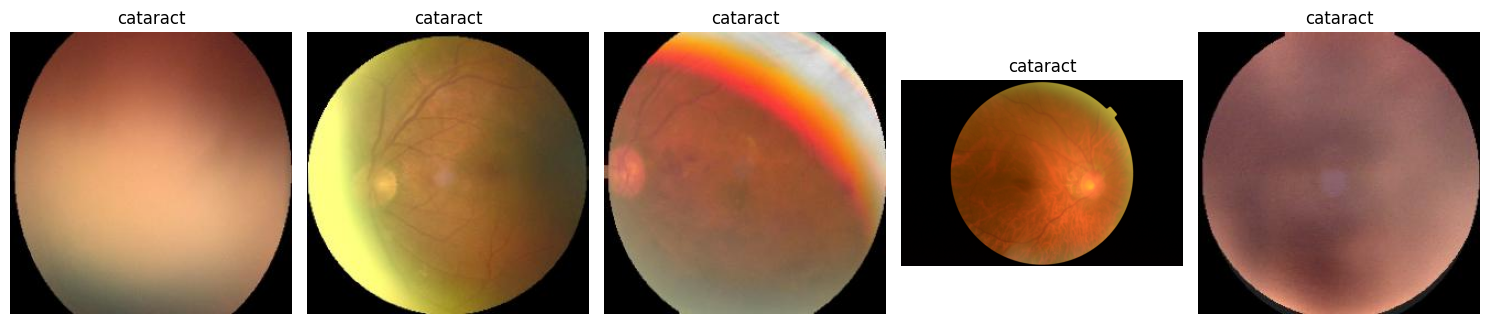

In [20]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset directory
dataset_dir = 'dataset/dataset'

# Function to display sample images
def display_sample_images(dataset_dir, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    sample_count = 0

    # Walk through the dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        class_name = os.path.basename(root)
        if files:
            for file in files[:num_samples]:
                if sample_count < num_samples:
                    file_path = os.path.join(root, file)
                    try:
                        img = mpimg.imread(file_path)
                        axes[sample_count].imshow(img)
                        axes[sample_count].set_title(class_name)
                        axes[sample_count].axis('off')
                        sample_count += 1
                    except Exception as e:
                        print(f"Error loading image {file_path}: {e}")
        if sample_count >= num_samples:
            break

    plt.tight_layout()
    plt.show()

# Call the function to display sample images
display_sample_images(dataset_dir)


In [15]:
# Import library yang diperlukan
import os
import time
# import data handling tools
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Activation, GlobalAveragePooling2D
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Class untuk memproses dataset penyakit mata

class EyeDiseaseDataset:
    def __init__(self, dataDir):
        self.data_dir = dataDir

# Method untuk mendapatkan path file dan label
    def dataPaths(self):
        filepaths = []
        labels = []
        folds = os.listdir(self.data_dir)
        for fold in folds:
            foldPath = os.path.join(self.data_dir, fold)
            filelist = os.listdir(foldPath)
            for file in filelist:
                fpath = os.path.join(foldPath, file)
                filepaths.append(fpath)
                labels.append(fold)
        return filepaths, labels

# Method untuk membuat DataFrame dari path file dan label
    def dataFrame(self, files, labels):

        Fseries = pd.Series(files, name='filepaths')
        Lseries = pd.Series(labels, name='labels')
        return pd.concat([Fseries, Lseries], axis=1)
# Method untuk membagi dataset menjadi train, validation, dan test
    def split_(self):
        files, labels = self.dataPaths()
        df = self.dataFrame(files, labels)
        strat = df['labels']
        trainData, dummyData = train_test_split(df, train_size=0.8, shuffle=True, random_state=42, stratify=strat)
        strat = dummyData['labels']
        validData, testData = train_test_split(dummyData, train_size=0.5, shuffle=True, random_state=42, stratify=strat)
        return trainData, validData, testData



In [17]:
dataDir=f'{dataset_dir}/dataset/'

In [ ]:
dataSplit = EyeDiseaseDataset(dataDir)
train_data, valid_data, test_data = dataSplit.split_()



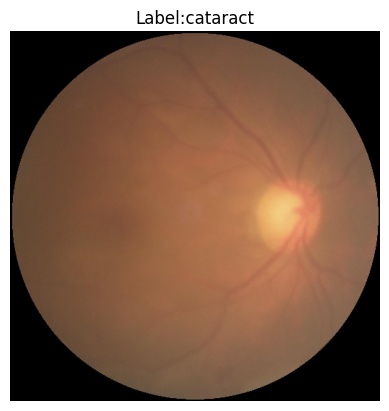

In [ ]:
def display_random_image(df):
    random_row = df.sample(1).iloc[0]
    filepath = random_row['filepaths']
    label = random_row['labels']

    img = Image.open(filepath)
    plt.imshow(img)
    plt.title(f'Label:{label}')
    plt.axis('off')
    plt.show()

display_random_image(train_data)

In [ ]:
# Fungsi untuk augmentasi data
def augment_data( train_df, valid_df, test_df, batch_size=16):

    img_size = (256,256)
    channels = 3
    color = 'rgb'

# Augmentasi untuk data training
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
              rotation_range=30,
              horizontal_flip=True,
              vertical_flip=True,
              brightness_range=[0.5, 1.5])

    valid_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
# Membuat generator untuk data training
    train_generator = train_datagen.flow_from_dataframe(
              train_df,
              x_col='filepaths',
              y_col='labels',
              target_size=img_size,
              color_mode=color,
              batch_size=batch_size,
              shuffle=True,
              class_mode='categorical'
          )

    print("Shape of augmented training images:", train_generator.image_shape)
# Generator untuk data validasi
    valid_generator = valid_test_datagen.flow_from_dataframe(
              valid_df,
              x_col='filepaths',
              y_col='labels',
              target_size=img_size,
              color_mode=color,
              batch_size=batch_size,
              shuffle=True,
              class_mode='categorical'
          )

    print("Shape of validation images:", valid_generator.image_shape)
# Generator untuk data test
    test_generator = valid_test_datagen.flow_from_dataframe(
              test_df,
              x_col='filepaths',
              y_col='labels',
              target_size=img_size,
              color_mode=color,
              batch_size=batch_size,
              shuffle=False,
              class_mode='categorical'
          )

    print("Shape of test images:", test_generator.image_shape)

    return train_generator, valid_generator, test_generator

In [ ]:
train_augmented, valid_augmented, test_augmented = augment_data(train_data, valid_data, test_data)

Found 3373 validated image filenames belonging to 4 classes.
Shape of augmented training images: (256, 256, 3)
Found 422 validated image filenames belonging to 4 classes.
Shape of validation images: (256, 256, 3)
Found 422 validated image filenames belonging to 4 classes.
Shape of test images: (256, 256, 3)


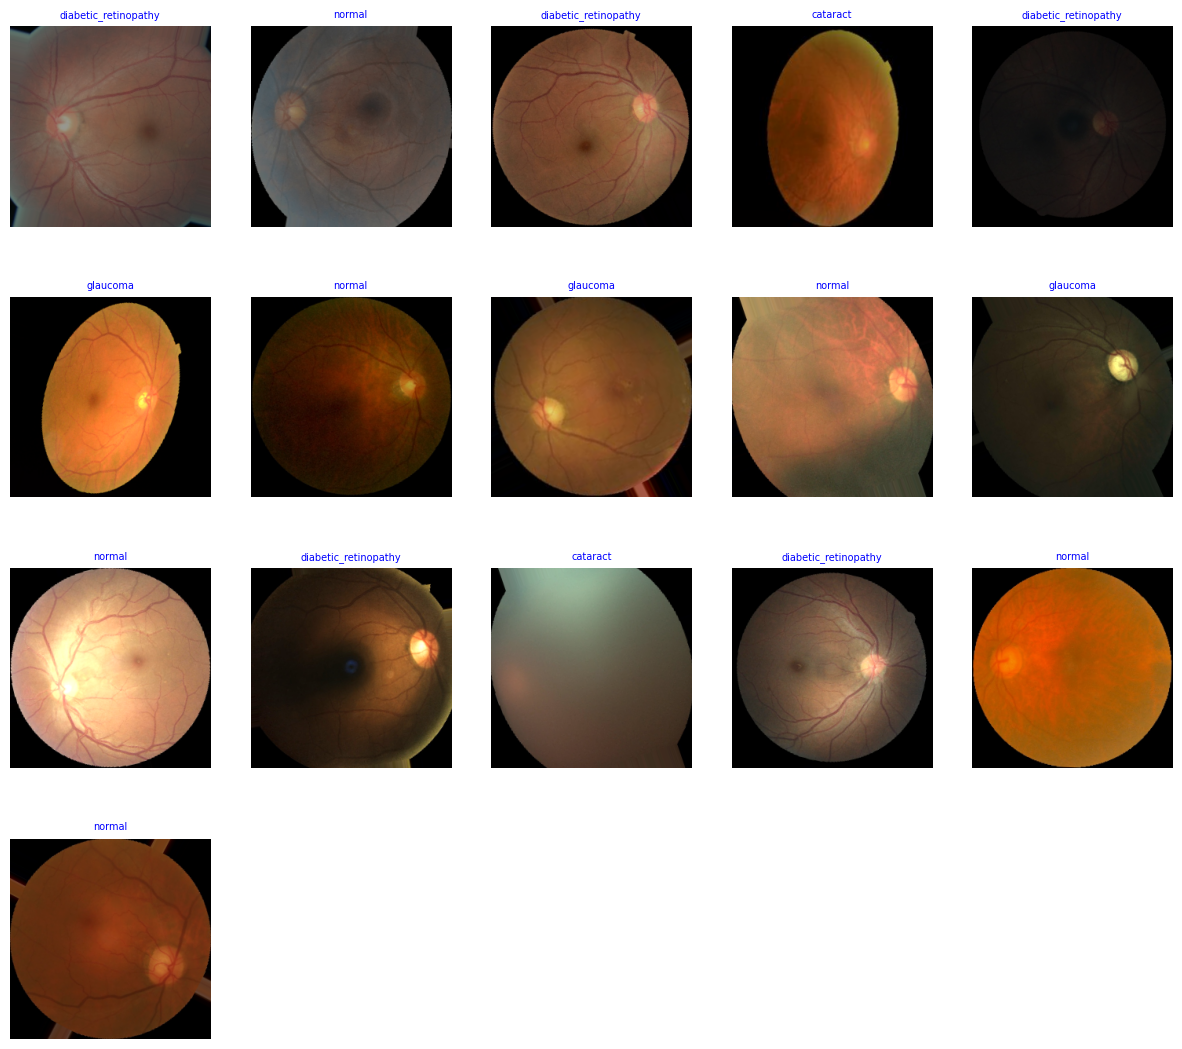

In [ ]:
def show_images(gen):

    g_dict = gen.class_indices
    classes = list(g_dict.keys())
    images, labels = next(gen)
    length = len(labels)
    sample = min(length, 20)
    plt.figure(figsize= (15, 17))
    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color= 'blue', fontsize= 7 )
        plt.axis('off')
    plt.show()
show_images(train_augmented)

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import regularizers

classes = len(list(train_augmented.class_indices.keys()))
# Memuat model EfficientNetB3 pre-trained
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
# Membekukan layer-layer pada model dasar
for layer in base_model.layers:
    layer.trainable = False
# Menambahkan layer-layer baru di atas model dasar
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu' , kernel_regularizer = regularizers.l2(0.01))(x)

predictions = Dense(classes, activation='softmax', kernel_regularizer = regularizers.l2(0.01))(x)
# Membuat model final
model = Model(inputs=base_model.input, outputs=predictions)
# Mengkompilasi model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

43941136/43941136 [==============================] - 3s 0us/step


In [ ]:
# Melatih model
history = model.fit(
    train_augmented,
    epochs=15,
    validation_data=valid_augmented,
    )

Epoch 1/15
211/211 [==============================] - 115s 467ms/step - loss: 2.3605 - accuracy: 0.7358 - val_loss: 1.0202 - val_accuracy: 0.7630
Epoch 2/15
211/211 [==============================] - 83s 395ms/step - loss: 0.8125 - accuracy: 0.7874 - val_loss: 0.7430 - val_accuracy: 0.8009
Epoch 3/15
211/211 [==============================] - 82s 386ms/step - loss: 0.7430 - accuracy: 0.7839 - val_loss: 0.7960 - val_accuracy: 0.7417
Epoch 4/15
211/211 [==============================] - 81s 384ms/step - loss: 0.7201 - accuracy: 0.7859 - val_loss: 0.7568 - val_accuracy: 0.7701
Epoch 5/15
211/211 [==============================] - 84s 399ms/step - loss: 0.6811 - accuracy: 0.7945 - val_loss: 0.7185 - val_accuracy: 0.7938
Epoch 6/15
211/211 [==============================] - 82s 388ms/step - loss: 0.6733 - accuracy: 0.7951 - val_loss: 0.7126 - val_accuracy: 0.7867
Epoch 7/15
211/211 [==============================] - 83s 396ms/step - loss: 0.6869 - accuracy: 0.7925 - val_loss: 0.7431 - val_a

Training Accuracy: 0.8117402791976929
Validation Accuracy: 0.8578199148178101


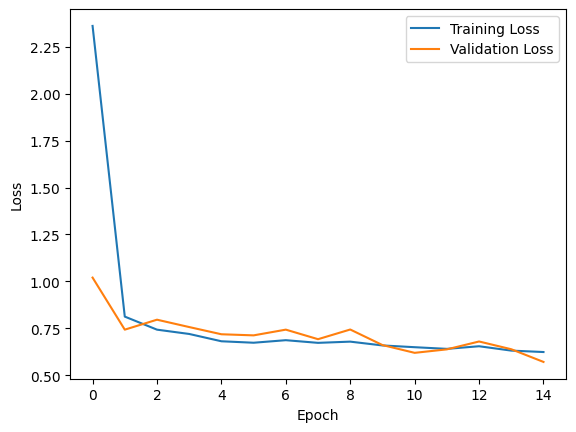

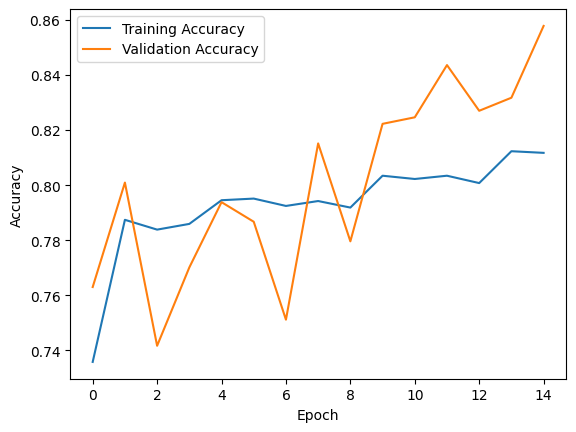

In [ ]:
# Menampilkan akurasi akhir
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])
# Visualisasi kurva loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Visualisasi kurva akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 2s 2s/step


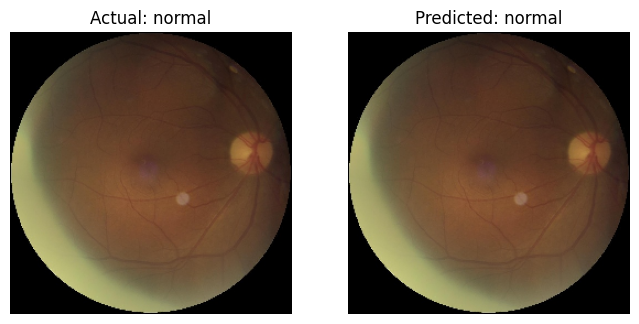

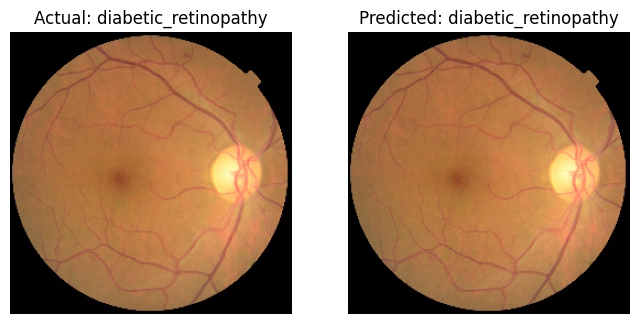

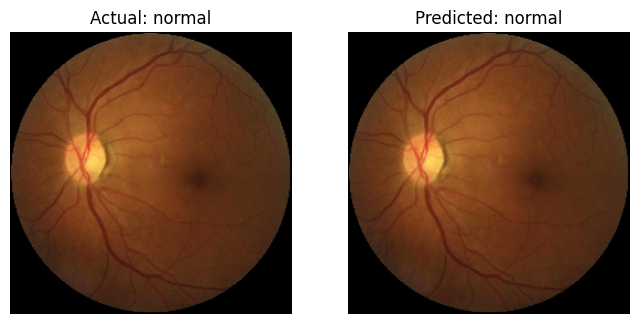

In [ ]:
# Fungsi untuk menampilkan prediksi vs aktual
def plot_actual_vs_predicted(model, test_data, num_samples=3):

    test_images, test_labels = next(iter(test_data))

    predictions = model.predict(test_images)

    class_labels = list(train_augmented.class_indices.keys())

    sample_indices = np.random.choice(range(len(test_images)), num_samples, replace=False)

    for i in sample_indices:
        actual_label = class_labels[np.argmax(test_labels[i])]
        predicted_label = class_labels[np.argmax(predictions[i])]
        plt.figure(figsize=(8, 4))
        # Actual Image
        plt.subplot(1, 2, 1)
        plt.imshow(test_images[i].astype(np.uint8))
        plt.title(f'Actual: {actual_label}')
        plt.axis('off')
        # Predicted Image
        plt.subplot(1, 2, 2)
        plt.imshow(test_images[i].astype(np.uint8))
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()
# Menampilkan actual vs predicted
plot_actual_vs_predicted(model, test_augmented)